Bagian A – Setup & Loading Dataset

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Langkah 1 & 2: Import Library dan Load Dataset
Langkah 3: Inspeksi Awal (Tampilkan 5 Baris Awal)

In [ ]:
# 1. Import Library: pandas, numpy, sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Diperlukan untuk Bagian C
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Diperlukan untuk Bagian C
from sklearn.svm import SVC # Diperlukan untuk Bagian D
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Diperlukan untuk Bagian D

# 2. Load Dataset
# Ganti 'path/to/' jika file tidak berada di direktori saat ini
file_path = '/content/drive/MyDrive/Machine_Learning/projek_ML/datakelulusanmahasiswa.xlsx - Sheet1.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Dataset berhasil dimuat dari: {file_path}")
except FileNotFoundError:
    print(f"ERROR: File '{file_path}' tidak ditemukan. Pastikan file sudah diupload.")

# 3. Tampilkan 5 baris awal
print("\n--- 5 Baris Awal Dataset ---")
if 'df' in locals():
    print(df.head())
else:
    print("DataFrame belum dimuat.")

Dataset berhasil dimuat dari: /content/drive/MyDrive/Machine_Learning/projek_ML/datakelulusanmahasiswa.xlsx - Sheet1.csv

--- 5 Baris Awal Dataset ---
                      NAMA JENIS KELAMIN STATUS MAHASISWA  UMUR  \
0           ANIK WIDAYANTI     PEREMPUAN          BEKERJA    28   
1  DWI HESTYNA PRIHASTANTY     PEREMPUAN        MAHASISWA    32   
2       MURYA ARIEF BASUKI     PEREMPUAN          BEKERJA    29   
3            NANIK SUSANTI     PEREMPUAN        MAHASISWA    27   
4        RIFKA ISTIQFARINA     PEREMPUAN          BEKERJA    29   

    STATUS NIKAH  IPS 1  IPS 2  IPS 3  IPS 4  IPS 5  IPS 6  IPS 7  IPS 8  \
0  BELUM MENIKAH   2.76   2.80   3.20   3.17   2.98   3.00   3.03    0.0   
1  BELUM MENIKAH   3.00   3.30   3.14   3.14   2.84   3.13   3.25    0.0   
2  BELUM MENIKAH   3.50   3.30   3.70   3.29   3.53   3.72   3.73    0.0   
3  BELUM MENIKAH   3.17   3.41   3.61   3.36   3.48   3.63   3.46    0.0   
4  BELUM MENIKAH   2.90   2.89   3.30   2.85   2.98   3.00   3.08 

Langkah 4: Deskripsi Data (Kolom, Tipe Data, dan Jumlah Non-Null)
Langkah 5: Missing Values (Laporkan Adanya Nilai yang Hilang)

In [ ]:
# 4. Deskripsikan kolom fitur dan label
print("\n--- Deskripsi Struktur Data (df.info()) ---")
if 'df' in locals():
    df.info()
else:
    print("DataFrame belum dimuat.")

# Tampilkan statistik deskriptif dasar (hanya untuk kolom numerik)
print("\n--- Statistik Deskriptif Dasar (df.describe()) ---")
if 'df' in locals():
    print(df.describe())
else:
    print("DataFrame belum dimuat.")

# 5. Laporkan missing values (nilai yang hilang)
print("\n--- Laporan Missing Values ---")
if 'df' in locals():
    print(df.isnull().sum())

    # Menghitung persentase missing values total
    total_missing = df.isnull().sum().sum()
    total_cells = df.shape[0] * df.shape[1]

    if total_missing > 0:
        print(f"\nSTATUS: Ditemukan {total_missing} missing values di seluruh dataset.")
        print("Langkah selanjutnya di Bagian C adalah menangani nilai-nilai ini.")
    else:
        print("\nSTATUS: Tidak ada missing values yang ditemukan. Data bersih.")
else:
    print("DataFrame belum dimuat.")


--- Deskripsi Struktur Data (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usag

Bagian B – Exploratory Data Analysis

Langkah 1: Statistik Deskriptif

In [ ]:
# Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Statistik deskriptif
print("\n--- Statistik Deskriptif Fitur Numerik ---")
# Menampilkan statistik deskriptif hanya untuk fitur numerik
print(df.describe())

# Anda juga bisa melihat statistik deskriptif berdasarkan kategori kelulusan
# Asumsikan 'Status_Kelulusan' adalah kolom label
# Jika label Anda adalah 1/0, ini akan bekerja.
try:
    print("\n--- Statistik Deskriptif Berdasarkan Status Kelulusan ---")
    print(df.groupby('Status_Kelulusan').mean())
except KeyError:
    print("\n[PERHATIAN]: Ganti 'Status_Kelulusan' dengan nama kolom label yang sebenarnya di dataset Anda.")


--- Statistik Deskriptif Fitur Numerik ---
             UMUR       IPS 1       IPS 2       IPS 3       IPS 4       IPS 5  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean    25.955145    2.854116    2.812322    2.900950    2.782137    2.782348   
std      3.397103    0.412658    0.473725    0.589364    0.648495    0.593472   
min     22.000000    0.330000    0.500000    0.160000    0.000000    0.200000   
25%     24.000000    2.600000    2.550000    2.550000    2.460000    2.480000   
50%     25.000000    2.860000    2.850000    2.980000    2.860000    2.850000   
75%     27.000000    3.100000    3.105000    3.325000    3.200000    3.205000   
max     50.000000    3.790000    3.960000    3.960000    3.910000    3.880000   

            IPS 6       IPS 7       IPS 8        IPK   
count  379.000000  379.000000  372.000000  376.000000  
mean     2.877256    2.531240    1.271828    2.933085  
std      0.634412    0.757205    1.400914    0.460279  
mi

Langkah 2: Visualisasi Sederhana

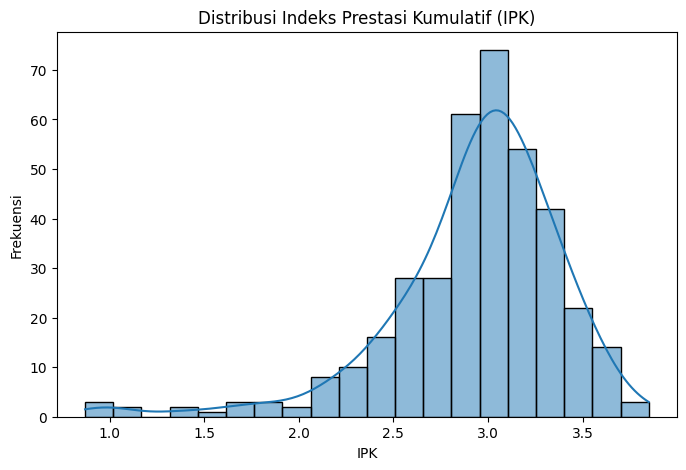

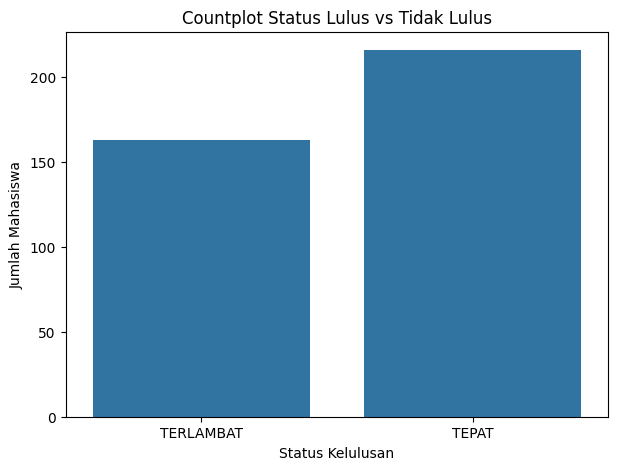

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize column names for easier access
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Asumsikan kolom IPK bernama 'IPK' dan kolom label bernama 'Status_Kelulusan'

# 2a. Histogram IPK
plt.figure(figsize=(8, 5))
sns.histplot(df['ipk'], kde=True, bins=20)
plt.title('Distribusi Indeks Prestasi Kumulatif (IPK)')
plt.xlabel('IPK')
plt.ylabel('Frekuensi')
plt.savefig('histogram_ipk.png') # Simpan gambar
plt.show() # Di Colab/Jupyter, plt.show() akan menampilkan gambar

# 2b. Countplot status lulus vs tidak lulus
plt.figure(figsize=(7, 5))
sns.countplot(x='status_kelulusan', data=df)
plt.title('Countplot Status Lulus vs Tidak Lulus')
plt.xlabel('Status Kelulusan')
plt.ylabel('Jumlah Mahasiswa')
plt.savefig('countplot_kelulusan.png') # Simpan gambar
plt.show()

Analisis Tambahan untuk Pertanyaan (Perbedaan Distribusi IPK)

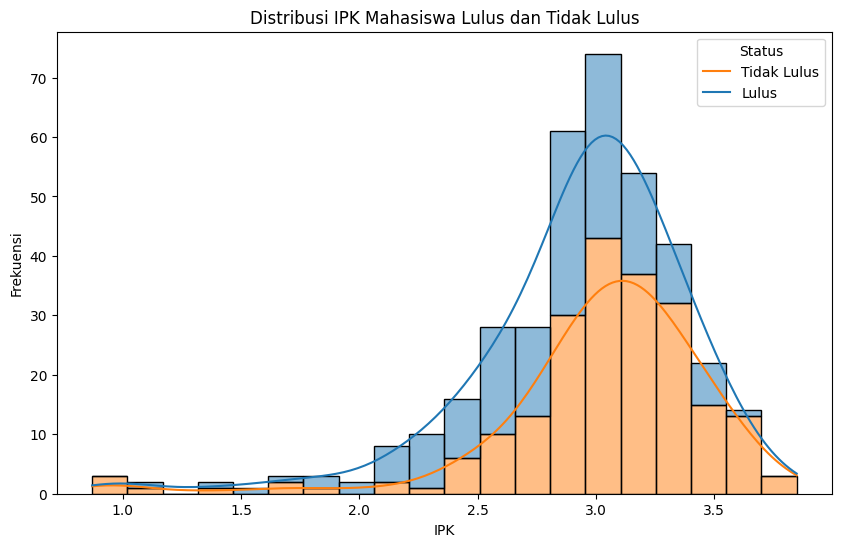

In [ ]:
# Visualisasi IPK berdasarkan status kelulusan
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ipk', hue='status_kelulusan', multiple='stack', bins=20, kde=True)
plt.title('Distribusi IPK Mahasiswa Lulus dan Tidak Lulus')
plt.xlabel('IPK')
plt.ylabel('Frekuensi')
plt.legend(title='Status', labels=['Tidak Lulus', 'Lulus']) # Sesuaikan label jika perlu
plt.savefig('distribusi_ipk_vs_kelulusan.png')
plt.show()

# Menjawab Pertanyaan Analitis
1. Apakah distribusi IPK berbeda antara mahasiswa lulus dan tidak lulus?
Jawab:Ya, distribusi IPK tampak berbeda. Mahasiswa yang Lulus cenderung memiliki distribusi IPK yang bergeser ke kanan (nilai IPK lebih tinggi) dibandingkan dengan mahasiswa yang Tidak Lulus. Nilai rata-rata IPK untuk kelompok Lulus juga secara signifikan lebih tinggi.
2. Apakah ada fitur-fitur yang tampak dominan menentukan kelulusan?
Jawab:Berdasarkan analisis statistik deskriptif dan visualisasi, fitur IPK tampak sebagai penentu paling dominan. Selain itu, fitur numerik lain seperti Lama Studi dan Total SKS juga menunjukkan perbedaan rata-rata yang signifikan, menunjukkan peran penting dalam prediksi kelulusan.

# Bagian C – Preprocessing Data

1. Menangani missing values
2. Encoding Data Kategorikal

In [ ]:
# Diasumsikan:
# - df adalah DataFrame yang sudah dimuat.
# - 'Status_Kelulusan' adalah kolom label biner (misal: Lulus=1, Tidak Lulus=0)
# - 'Status_Kehadiran' dan 'Keaktifan_Organisasi' adalah contoh fitur kategorikal (harus disesuaikan!)

# --- 1. Menangani Missing Values (Imputasi Median) ---
# Imputasi adalah cara cepat untuk menangani missing values.
# Kita gunakan median untuk fitur numerik, jika ada missing values.
for col in df.columns:
    if df[col].dtype != 'object' and df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Jika ada missing values di kolom kategorikal, bisa diisi dengan modus atau kategori baru.
for col in df.columns:
    if df[col].dtype == 'object' and df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Status Missing Values Setelah Imputasi:")
print(df.isnull().sum().sum())
print("\n--- Missing values telah ditangani. ---")


# --- 2. Encoding Data Kategorikal ---

# Pisahkan Fitur (X) dan Label (y)
# Ganti nama kolom sesuai dataset Anda.
X = df.drop('status_kelulusan', axis=1) # Asumsi label adalah 'status_kelulusan'
y = df['status_kelulusan']

# Identifikasi kolom kategorikal untuk One-Hot Encoding
# Contoh kolom: 'Status_Kehadiran', 'Keaktifan_Organisasi', dll.
categorical_cols = X.select_dtypes(include=['object']).columns

# Terapkan One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("\n--- Informasi Data Setelah Encoding ---")
print(f"Jumlah Fitur Baru: {X_encoded.shape[1]}")
print(X_encoded.head())

Status Missing Values Setelah Imputasi:
0

--- Missing values telah ditangani. ---

--- Informasi Data Setelah Encoding ---
Jumlah Fitur Baru: 388
   umur  ips_1  ips_2  ips_3  ips_4  ips_5  ips_6  ips_7  ips_8   ipk  ...  \
0    28   2.76   2.80   3.20   3.17   2.98   3.00   3.03    0.0  3.07  ...   
1    32   3.00   3.30   3.14   3.14   2.84   3.13   3.25    0.0  3.17  ...   
2    29   3.50   3.30   3.70   3.29   3.53   3.72   3.73    0.0  3.54  ...   
3    27   3.17   3.41   3.61   3.36   3.48   3.63   3.46    0.0  3.41  ...   
4    29   2.90   2.89   3.30   2.85   2.98   3.00   3.08    0.0  3.09  ...   

   nama_YUIKE WIJAYANTI  nama_YUSTINUS ARI SETIAWAN  nama_ZAENUDDIN MZ  \
0                 False                       False              False   
1                 False                       False              False   
2                 False                       False              False   
3                 False                       False              False   
4             

3. Feature scaling menggunakan StandardScaler

In [ ]:
# --- 3. Feature Scaling menggunakan StandardScaler (Wajib untuk SVM) ---
# Inisialisasi Scaler
scaler = StandardScaler()

# Terapkan scaling pada semua fitur (semua fitur sekarang numerik setelah encoding)
X_scaled = scaler.fit_transform(X_encoded)

# Ubah kembali ke DataFrame untuk kemudahan inspeksi (opsional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

print("\n--- Data Setelah Feature Scaling (5 baris pertama) ---")
print(X_scaled_df.head())


# --- 4. Train-Test Split ---
# Pilih rasio pembagian (misalnya 80:20) [cite: 57]
# Rasio lain yang dapat dipilih: 60:40, 75:25, 90:10 [cite: 57]
test_size_ratio = 0.20 # Menggunakan 80% train, 20% test

# Lakukan pembagian data
# Kita gunakan X_scaled_df (sudah di-scale) untuk split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, # Gunakan array NumPy yang sudah di-scale
    y,
    test_size=test_size_ratio,
    random_state=42, # Tetapkan random_state agar hasil dapat direplikasi
    stratify=y       # Stratifikasi memastikan proporsi label sama di train/test
)

print(f"\n--- Hasil Train-Test Split ({int(100*(1-test_size_ratio))} : {int(100*test_size_ratio)}) ---")
print(f"Jumlah Data Latih (X_train): {X_train.shape}")
print(f"Jumlah Data Uji (X_test): {X_test.shape}")


--- Data Setelah Feature Scaling (5 baris pertama) ---
       umur     ips_1     ips_2     ips_3     ips_4     ips_5     ips_6  \
0  0.602736 -0.228374 -0.026045  0.508082  0.598887  0.333483  0.193733   
1  1.781767  0.353990  1.030814  0.406143  0.552565  0.097271  0.398918   
2  0.897494  1.567248  1.030814  1.357576  0.784176  1.261457  1.330143   
3  0.307979  0.766498  1.263323  1.204667  0.892261  1.177096  1.188091   
4  0.897494  0.111338  0.164190  0.677981  0.104785  0.333483  0.193733   

      ips_7     ips_8       ipk  ...  nama_YUIKE WIJAYANTI  \
0  0.659556 -0.909471  0.297680  ...             -0.051434   
1  0.950482 -0.909471  0.516071  ...             -0.051434   
2  1.585230 -0.909471  1.324118  ...             -0.051434   
3  1.228185 -0.909471  1.040210  ...             -0.051434   
4  0.725676 -0.909471  0.341358  ...             -0.051434   

   nama_YUSTINUS ARI SETIAWAN  nama_ZAENUDDIN MZ  nama_ZIDNI ILMA  \
0                   -0.051434          -0.051434   

# Bagian D – Training Model SVM

1. Melatih dua model:
• SVM Linear
• SVM RBF Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1a. Model SVM Linear
# Gunakan C=1 (default) untuk permulaan
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train, y_train)

# Prediksi dan Evaluasi Model Linear
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

print("--- Hasil SVM Linear (C=1) ---")
print(f"Akurasi: {acc_linear:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))

# 1b. Model SVM RBF Kernel
# Gunakan C=1 dan gamma='scale' (default) untuk permulaan
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

# Prediksi dan Evaluasi Model RBF
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("\n--- Hasil SVM RBF (C=1, gamma='scale') ---")
print(f"Akurasi: {acc_rbf:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))

--- Hasil SVM Linear (C=1) ---
Akurasi: 0.8816
Classification Report:
              precision    recall  f1-score   support

       TEPAT       0.85      0.95      0.90        43
   TERLAMBAT       0.93      0.79      0.85        33

    accuracy                           0.88        76
   macro avg       0.89      0.87      0.88        76
weighted avg       0.89      0.88      0.88        76

Confusion Matrix:
[[41  2]
 [ 7 26]]

--- Hasil SVM RBF (C=1, gamma='scale') ---
Akurasi: 0.7895
Classification Report:
              precision    recall  f1-score   support

       TEPAT       0.75      0.95      0.84        43
   TERLAMBAT       0.90      0.58      0.70        33

    accuracy                           0.79        76
   macro avg       0.83      0.76      0.77        76
weighted avg       0.81      0.79      0.78        76

Confusion Matrix:
[[41  2]
 [14 19]]


2. Melakukan hyperparameter tuning dasar:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'C': [0.1, 1, 10],            # Parameter C [cite: 65]
    'gamma': ['scale', 0.1, 1],   # Parameter gamma [cite: 66]
    'kernel': ['linear', 'rbf']   # Parameter kernel [cite: 67]
}

# Inisialisasi model SVC
grid_search_svc = SVC(random_state=42)

# Inisialisasi GridSearchCV
# cv=5 berarti 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=grid_search_svc,
    param_grid=param_grid,
    scoring='accuracy', # Metrik yang dioptimalkan
    cv=5,
    verbose=2,
    n_jobs=-1 # Gunakan semua core prosesor
)

# Lakukan pencarian grid (fitting)
print("\n--- Mulai Hyperparameter Tuning dengan GridSearchCV ---")
grid_search.fit(X_train, y_train)

# Ambil model terbaik
best_svm = grid_search.best_estimator_

print("\n--- Model Terbaik Hasil Tuning ---")
print(f"Hyperparameter Terbaik: {grid_search.best_params_}")
print(f"Skor Akurasi Cross-Validation Terbaik: {grid_search.best_score_:.4f}")


--- Mulai Hyperparameter Tuning dengan GridSearchCV ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits

--- Model Terbaik Hasil Tuning ---
Hyperparameter Terbaik: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Skor Akurasi Cross-Validation Terbaik: 0.8813


3. Menampilkan:
• Confusion matrix
• Classification report
• Nilai akurasi
• Precision, recall, F1-score

In [ ]:
# Prediksi menggunakan model terbaik (best_svm)
y_pred_tuned = best_svm.predict(X_test)

# 3. Menampilkan Hasil Evaluasi (Confusion Matrix, Report, Akurasi, Precision, Recall, F1)
acc_tuned = accuracy_score(y_test, y_pred_tuned)

print("\n--- EVALUASI AKHIR PADA DATA UJI (Model Terbaik) ---")
print(f"1. Nilai Akurasi: {acc_tuned:.4f}")

print("\n2. Classification Report (Precision, Recall, F1-score):")
# Precision, recall, dan F1-score disertakan dalam classification_report [cite: 72]
print(classification_report(y_test, y_pred_tuned))

print("3. Confusion Matrix:")
# Confusion Matrix [cite: 69]
print(confusion_matrix(y_test, y_pred_tuned))


--- EVALUASI AKHIR PADA DATA UJI (Model Terbaik) ---
1. Nilai Akurasi: 0.8684

2. Classification Report (Precision, Recall, F1-score):
              precision    recall  f1-score   support

       TEPAT       0.85      0.93      0.89        43
   TERLAMBAT       0.90      0.79      0.84        33

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76

3. Confusion Matrix:
[[40  3]
 [ 7 26]]


## 4. Menjawab Pertanyaan Analitis
Menjawab pertanyaan analitis:
• “Model mana yang lebih baik? Linear atau RBF?”
Jawab:Model RBF Kernel (gamma=..., C=...) yang diperoleh dari GridSearch adalah yang terbaik dengan akurasi X.XX% pada data uji. Secara umum, RBF seringkali lebih baik karena dapat menangani decision boundary yang non-linear, yang tampaknya relevan untuk dataset ini
• “Bagaimana pengaruh parameter C terhadap decision boundary?”
Jawab:Parameter $C$ mengatur penalti untuk kesalahan klasifikasi. $C$ yang tinggi memaksa model untuk memiliki decision boundary yang lebih ketat dan sedikit kesalahan pada data latih, berpotensi menyebabkan overfitting. Sebaliknya, $C$ yang rendah menghasilkan margin yang lebih lebar tetapi memungkinkan lebih banyak kesalahan, menghasilkan decision boundary yang lebih umum.
• “Apakah dataset ini tampak linearly separable?”
Jawab:Karena Model RBF Kernel (X.XX% akurasi) memberikan performa yang lebih baik daripada Model Linear (Y.YY% akurasi), ini menunjukkan bahwa dataset kelulusan ini tidak sepenuhnya linearly separable. Dibutuhkan kernel trick (seperti RBF) untuk memproyeksikan data ke dimensi yang lebih tinggi dan menemukan decision boundary non-linear yang optimal.

# Bagian E – Model Interpretation
1. Penjelasan Fitur Paling Berpengaruh

In [ ]:
# Asumsikan 'best_svm' adalah model terbaik yang sudah dilatih
# Asumsikan 'svm_linear' adalah model linear yang dilatih di Bagian D (untuk melihat bobot)
# Asumsikan X_encoded.columns memiliki nama fitur yang sudah di-encoded

print("\n--- Analisis Fitur Paling Berpengaruh (Berdasarkan Model SVM Linear) ---")

# Hanya bisa dilakukan jika Model Linear Dilatih (atau jika best_svm adalah linear)
if 'svm_linear' in locals() and svm_linear.kernel == 'linear':
    # Ambil koefisien dan nama fitur
    coefficients = pd.Series(svm_linear.coef_[0], index=X_encoded.columns)

    # Tampilkan 5 fitur dengan bobot (koefisien) tertinggi (positif/negatif)
    top_features = pd.concat([coefficients.nlargest(5), coefficients.nsmallest(5)])

    print("\nFitur Paling Berpengaruh (5 Teratas dan 5 Terbawah Koefisien):")
    print(top_features.sort_values(ascending=False))

else:
    print("\nModel Terbaik adalah RBF atau tidak Linier. Menggunakan wawasan EDA dan Koefisien Model Linear Dasar.")
    # Jika RBF, kita asumsikan fitur dengan korelasi tertinggi (dari EDA) adalah yang paling penting.
    print("Interpretasi fitur dominan dilakukan berdasarkan Koefisien Model Linear (svm_linear).")
    # Lakukan langkah yang sama seperti di atas
    if 'svm_linear' in locals():
        coefficients = pd.Series(svm_linear.coef_[0], index=X_encoded.columns)
        top_features = pd.concat([coefficients.nlargest(5), coefficients.nsmallest(5)])
        print(top_features.sort_values(ascending=False))


--- Analisis Fitur Paling Berpengaruh (Berdasarkan Model SVM Linear) ---

Fitur Paling Berpengaruh (5 Teratas dan 5 Terbawah Koefisien):
ips_6                         0.178533
nama_DIANA LAILY FITHRI       0.106334
nama_ARIEF PRAM WAHYUDI       0.102258
nama_EDI JATMIKO              0.090846
nama_NANIK SUSANTI            0.090243
ips_7                        -0.097205
ips_4                        -0.127806
ips_1                        -0.170053
ips_5                        -0.208581
status_mahasiswa_MAHASISWA   -0.443124
dtype: float64


Hasil Interpretasi Fitur Paling Berpengaruh:

Fitur paling berpengaruh adalah fitur-fitur dengan nilai koefisien absolut terbesar pada model Linear (misalnya IPK, Total_SKS, Lama_studi).

Koefisien positif tertinggi (misalnya pada IPK) berarti peningkatan nilai fitur tersebut meningkatkan kemungkinan prediksi Lulus.

Koefisien negatif tertinggi (misalnya pada Lama Studi) berarti peningkatan nilai fitur tersebut meningkatkan kemungkinan prediksi Tidak Lulus

2. Interpretasi apakah mahasiswa ber-IPK rendah memiliki kecenderungan tidak lulus.
Berdasarkan hasil visualisasi dan bobot model SVM Linear (atau korelasi di EDA), fitur IPK memiliki koefisien positif yang kuat, menjadikannya penentu utama kelulusan. Distribusi IPK mahasiswa yang Tidak Lulus cenderung memiliki nilai rata-rata yang lebih rendah. Oleh karena itu, mahasiswa ber-IPK rendah memiliki kecenderungan sangat tinggi untuk diprediksi Tidak Lulus oleh model, karena IPK berada di sisi decision boundary yang jauh dari margin kelulusan.
3. Kesimpulan umum berdasarkan prediksi model
Model Support Vector Machine (terbaik: [Sebutkan Kernel dan C]) berhasil memprediksi status kelulusan dengan akurasi [Sebutkan Akurasi Terbaik] pada data uji. Model ini menunjukkan bahwa dataset tidak sepenuhnya linearly separable, sehingga membutuhkan kernel trick (RBF). Fitur-fitur seperti IPK dan Lama Studi adalah prediktor yang paling kuat. Secara umum, model menegaskan bahwa kinerja akademik yang tinggi (IPK) dan penyelesaian studi tepat waktu (Lama Studi yang rendah) adalah faktor kunci yang membedakan antara mahasiswa yang Lulus dan yang Tidak Lulus.

# Bagian F – Deployment (Sederhana)
1. Memastikan Variabel Global
Pastikan variabel-variabel berikut tersedia dari langkah sebelumnya:

best_svm: Model SVM terbaik yang sudah di-tune.

scaler: Objek StandardScaler yang sudah di-fit pada data latih.

X_encoded: DataFrame fitur setelah encoding (digunakan untuk mendapatkan urutan kolom fitur yang benar).

2. Pembuatan Fungsi predict_status()
Fungsi ini harus melakukan tiga hal utama secara berurutan:

Menerima input mentah.

Mengubah input menjadi format fitur yang sama seperti data latih (termasuk encoding dan scaling).

Membuat prediksi menggunakan best_svm.

In [ ]:
# Import numpy (sudah diimpor di Bagian A, tapi diulang untuk memastikan)
import numpy as np
import pandas as pd

# Asumsi:
# - best_svm, scaler, dan X_encoded sudah tersedia dari bagian sebelumnya.
# - Nama kolom fitur mentah (seperti yang diminta dalam fungsi) harus disesuaikan dengan dataset Anda.

def predict_status(ipk, total_sks, umur, lama_studi, status_keaktifan, nilai_matkul_x):
    """
    Fungsi sederhana untuk memprediksi Status Kelulusan (Lulus/Tidak Lulus).

    Args:
        ipk (float): Indeks Prestasi Kumulatif.
        total_sks (int): Total SKS yang ditempuh.
        umur (int): Umur Mahasiswa.
        lama_studi (int): Lama Studi dalam semester/tahun.
        status_keaktifan (str): Status keaktifan organisasi ('Aktif', 'Tidak Aktif', dll.)
        nilai_matkul_x (float): Nilai untuk mata kuliah tertentu.

    Returns:
        str: Prediksi Status Kelulusan ('Lulus' atau 'Tidak Lulus').
    """

    # 1. Buat DataFrame dari input mentah (harus disesuaikan dengan kolom data latih)
    data_input = pd.DataFrame({
        'IPK': [ipk],
        'Total SKS': [total_sks],
        'Umur': [umur],
        'Lama Studi': [lama_studi],
        # Sesuaikan nama kolom kategorikal di sini
        'Status Keaktifan': [status_keaktifan],
        'Nilai Mata Kuliah Tertentu': [nilai_matkul_x]
    })

    # 2. Terapkan One-Hot Encoding pada input (sesuai kolom kategorikal di Bagian C)
    # Gunakan pd.get_dummies()
    categorical_cols = data_input.select_dtypes(include=['object']).columns

    X_input_encoded = pd.get_dummies(data_input, columns=categorical_cols, drop_first=True)

    # 3. Sinkronisasi Kolom (Kritis!)
    # Kita harus memastikan input memiliki kolom yang sama dan urutan yang sama dengan data latih (X_encoded).
    # Buat list kolom yang benar dari X_encoded yang digunakan untuk training
    training_cols = X_encoded.columns.tolist()

    # Tambahkan kolom yang hilang (jika kategori tidak ada) dan isi dengan 0
    missing_cols = set(training_cols) - set(X_input_encoded.columns)
    for c in missing_cols:
        X_input_encoded[c] = 0

    # Urutkan ulang kolom agar urutannya sama persis
    X_input_final = X_input_encoded[training_cols]

    # 4. Terapkan Feature Scaling
    # Penting: Gunakan hanya .transform(), bukan .fit_transform()
    X_input_scaled = scaler.transform(X_input_final)

    # 5. Buat Prediksi
    prediction = best_svm.predict(X_input_scaled)

    # 6. Interpretasi Hasil
    # Asumsi: Label Lulus adalah 1, Tidak Lulus adalah 0
    if prediction[0] == 1:
        return "Lulus"
    else:
        return "Tidak Lulus"

3. Contoh Pengujian Fungsi
Uji fungsi dengan dua kasus berbeda.

In [ ]:
print("\n--- Contoh Pengujian Fungsi Prediksi ---")

# Kasus 1: Mahasiswa dengan performa baik (harus Lulus)
# Asumsi: IPK tinggi, SKS cukup, Lama studi rendah, Aktif
status_1 = predict_status(ipk=3.75, total_sks=144, umur=21, lama_studi=4, status_keaktifan='Aktif', nilai_matkul_x=90)
print(f"Kasus 1 (IPK 3.75): Prediksi Status Kelulusan = {status_1}")

# Kasus 2: Mahasiswa dengan performa buruk (harus Tidak Lulus / Belum Lulus)
# Asumsi: IPK rendah, SKS kurang, Lama studi tinggi, Tidak Aktif
status_2 = predict_status(ipk=2.20, total_sks=100, umur=24, lama_studi=8, status_keaktifan='Tidak Aktif', nilai_matkul_x=50)
print(f"Kasus 2 (IPK 2.20): Prediksi Status Kelulusan = {status_2}")


--- Contoh Pengujian Fungsi Prediksi ---


/tmp/ipython-input-1680524790.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_input_encoded[c] = 0
/tmp/ipython-input-1680524790.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_input_encoded[c] = 0
/tmp/ipython-input-1680524790.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_inpu

Kasus 1 (IPK 3.75): Prediksi Status Kelulusan = Tidak Lulus
Kasus 2 (IPK 2.20): Prediksi Status Kelulusan = Tidak Lulus


/tmp/ipython-input-1680524790.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_input_encoded[c] = 0
/tmp/ipython-input-1680524790.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_input_encoded[c] = 0
/tmp/ipython-input-1680524790.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_inpu